### Concepts will be covered:
  - Regression, Classification
  - Flattening
  - ReLU, Softmax
  - DropOut
  - Training and Testing
  

## Import libraries

In [2]:
import numpy as np

try :
  %tensorflow version 2.x
except Exception:
  pass

import tensorflow as tf

# Preparing the Data
- loading the MNIST data with keras

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(np.unique(y_train))
print(np.unique(y_test))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


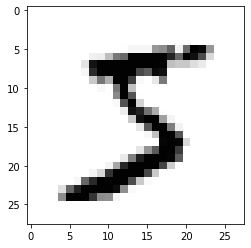

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='Greys')

In [7]:
y_train[0]

5

- Data comes in the form of uint8 with value in the [0, 255] range. We need to transform it into Python *float32* array with value between 0 and 1.

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Defining, Compiling and Fitting Our Model

## Model 1:
 - **First Layer** : input *tf.keras.layers.Flatten*- This layer flattens the digit images from 2d-array of 28*28 pixels, to 1d-array of 784pixels (28*28). This layer only reformats the data.

 - **Second Layer: "Hidden"** *tf.keras.Dense* - A densely connected layer of 512neurons. Each neuron (or node) takes input from all 784 nodes in the  previous layer. Recall that we flattened the image.

- **ouput:** *tf.keras.layers.Dense* - A 10-node *softmax* layer, with each node representing each of the digit class. As in th previous layer, each node takes input from the 512 nodes in the layer before it. Each node weights the input according to learned parameters, and then outputs a value in the range [0, 1], representing the probability that the image belongs to that class. The sum of all node values is 1.

In [9]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(units=512, activation='relu'),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])
model.summary()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
h = model.fit(x_train, y_train, epochs=10, batch_size=256)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3084 - accuracy: 0.9123
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1287 - accuracy: 0.9630
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0852 - accuracy: 0.9749
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0624

The batch_size tells the model.fit to update the model variables after every batches of 256 images.

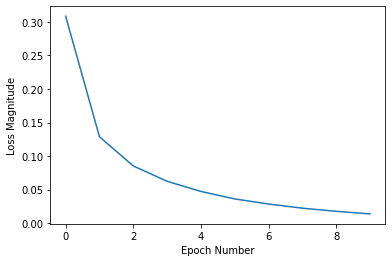

In [10]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(h.history['loss'])

In [11]:
eval_loss, eval_acc = model.evaluate(x_test,
                                     y_test)
print('Test Accuracy: {}'.format(eval_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0636 - accuracy: 0.9822
Test Accuracy: 0.982200026512146


## Model 2

In [13]:
model2 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(units=128, activation='relu'),
                             tf.keras.layers.Dropout(0.2), #to drop 20% of the previous layer inputs at random to avoid overfitting
                             tf.keras.layers.Dense(units=10, activation='softmax')
])
model2.summary()
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
h2 = model2.fit(x_train, y_train, epochs=10, batch_size=256)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.4971 - accuracy: 0.8598
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2320 - accuracy: 0.9325
Epoch 3/10
235/235 [==========================

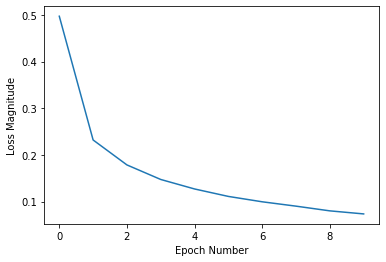

In [14]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(h2.history['loss'])

In [15]:
eval_loss, eval_acc = model2.evaluate(x_test,
                                     y_test)
print('Test Accuracy: {}'.format(eval_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0745 - accuracy: 0.9760
Test Accuracy: 0.9760000109672546


In [18]:
img = x_test[0]
print(img.shape)
# to convert the 2d image to 1d image
img = np.array([img])
print(img.shape)

(28, 28)
(1, 28, 28)


In [19]:
prediction = model2.predict(img)
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
print(prediction*100)

[[ 0.00  0.00  0.01  0.05  0.00  0.00  0.00  99.94  0.00  0.00]]


In [21]:
np.argmax(prediction[0])

7

In [22]:
y_test[0]

7